<center><b><h1> &nbsp;  &nbsp;  &nbsp; STAT 650- FINAL Project</h1><b></center>

<center><b>Developed by Pragati Naikare (UIN: 934008675)<b><center>
<center><b> PROJECT TITLE: REGRESSION ANALYSIS ON LIFE EXPECTANCY DATA (WHO)<center><b> 


<span><h1 style="color: Maroon;">2. Introduction</h1></span>


> <b> <h3> GOAL</h3></b>  The primary goal of this project is to investigate and analyze the factors influencing life expectancy across 193 countries from the years 2000 to 2015. The aim is to construct robust regression models that encompass various critical variables, including immunization, mortality rates, economic indicators, social factors, and other health-related determinants. This analysis will contribute to understanding the relationships between these factors and life expectancy, facilitating insights into improving the average lifespan of populations globally.

> <b> <h3> OBJECTIVE (Research Hypotheses)</h3></b>
> - Build  regression models to assess the impact of critical factors such as immunization, mortality rates, economic conditions, and social determinants on life expectancy.<br>
> - Provide insights and recommendations based on the findings to assist countries in identifying areas of focus to enhance their population's life expectancy effectively.<br>
> - Investigate the correlation between lifestyle choices (diet, exercise, smoking, alcohol consumption), education (schooling), and population density with life expectancy.<br>


> <b> <h3> BACKGROUND</h3></b> The study aims to investigate the factors affecting life expectancy across 193 countries by leveraging a comprehensive dataset sourced from the Global Health Observatory (GHO) under the World Health Organization (WHO). Past research primarily focused on demographic variables, income composition, and mortality rates, largely overlooking the impact of immunization and the Human Development Index (HDI). Furthermore, previous studies often utilized single-year data for all countries, lacking temporal depth. This project addresses these gaps, analyzing data spanning from 2000 to 2015 for all countries. Key immunization factors like Hepatitis B, Polio, and Diphtheria will be incorporated, alongside considerations for mortality, economic, social, and additional health-related factors. The objective is to uncover critical determinants influencing life expectancy, facilitating targeted improvements in public health interventions.



 <span><h1 style="color: Maroon;"> 3. Data Description </h1></span>


The dataset used for this project on life expectancy comprises data from the Global Health Observatory (GHO) under the World Health Organization (WHO) and corresponding economic data obtained from the United Nations. The collection method involved extracting health-related factors from the WHO repository for 193 countries, covering the period from 2000 to 2015. The dataset merges various health factors along with economic indicators, providing a comprehensive view of factors influencing life expectancy.

>Data Source - https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

| Features | Description | Data Type |
|----------|----------|----------|
|     Country   |   Country | object| 
|  Year |   Year  |   int64  |       
|   Status |  Developed or Developing status     | object |
|  Life Expectancy |   Life Expectancy in age  | float64  |
|  Adult Mortality |  Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population   |   float64  |       
|  infant deaths |   Number of Infant Deaths per 1000 population  | int64    |       
|  Alcohol |  Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)   |  float64   |       
| percentage expenditure  | Expenditure on health as a percentage of Gross Domestic Product per capita(%)  |   float64  |  
| Hepatitis B  |  (HepB) immunization coverage among 1-year-olds (%)    |   float64  |       
| Measles  | number of reported cases per 1000 population    |  int64   |       
|  BMI |    Average Body Mass Index of entire population |   float64  |       
|    under-five deaths |   Number of under-five deaths per 1000 population  |  int64   |       
|  Polio | Polio (Pol3) immunization coverage among 1-year-olds (%)  |float64| 
| Total expenditure | General government expenditure on health as a percentage of total government expenditure (%)|float64|
| Diphtheria | Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%) |float64|
| HIV/AIDS | Deaths per 1 000 live births HIV/AIDS (0-4 years) | float64|
| GDP  | Gross Domestic Product per capita (in USD) |float64 |
|Population | Population of the country |float64  |
| thinness 1-19 years|Prevalence of thinness among children and adolescents for Age 10 to 19 (% ) |float64 |
| thinness 5-9 years | Prevalence of thinness among children for Age 5 to 9(%) |float64|
 | Income composition of resources | Human Development Index in terms of income composition of resources (index ranging from 0 to 1) |float64 |
| Schooling  | Number of years of Schooling(years) |float64 |




 <span><h2 style="color: Maroon;"> Data Preprocessing </h2></span>


In [1]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)


In [2]:
data=pd.read_csv("Life Expectancy Data.csv")

In [3]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Handling NULL values

In [4]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
#Droping null values
data.dropna(inplace= True)

In [6]:
data.shape

(1649, 22)

In [7]:
# Checking duplicate values
data.duplicated().sum()

0

In [8]:
Numeric_cols = ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 
                'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 
                'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', 
                ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

Categorical_cols = ['Country','Status']

### Handling Outliers 

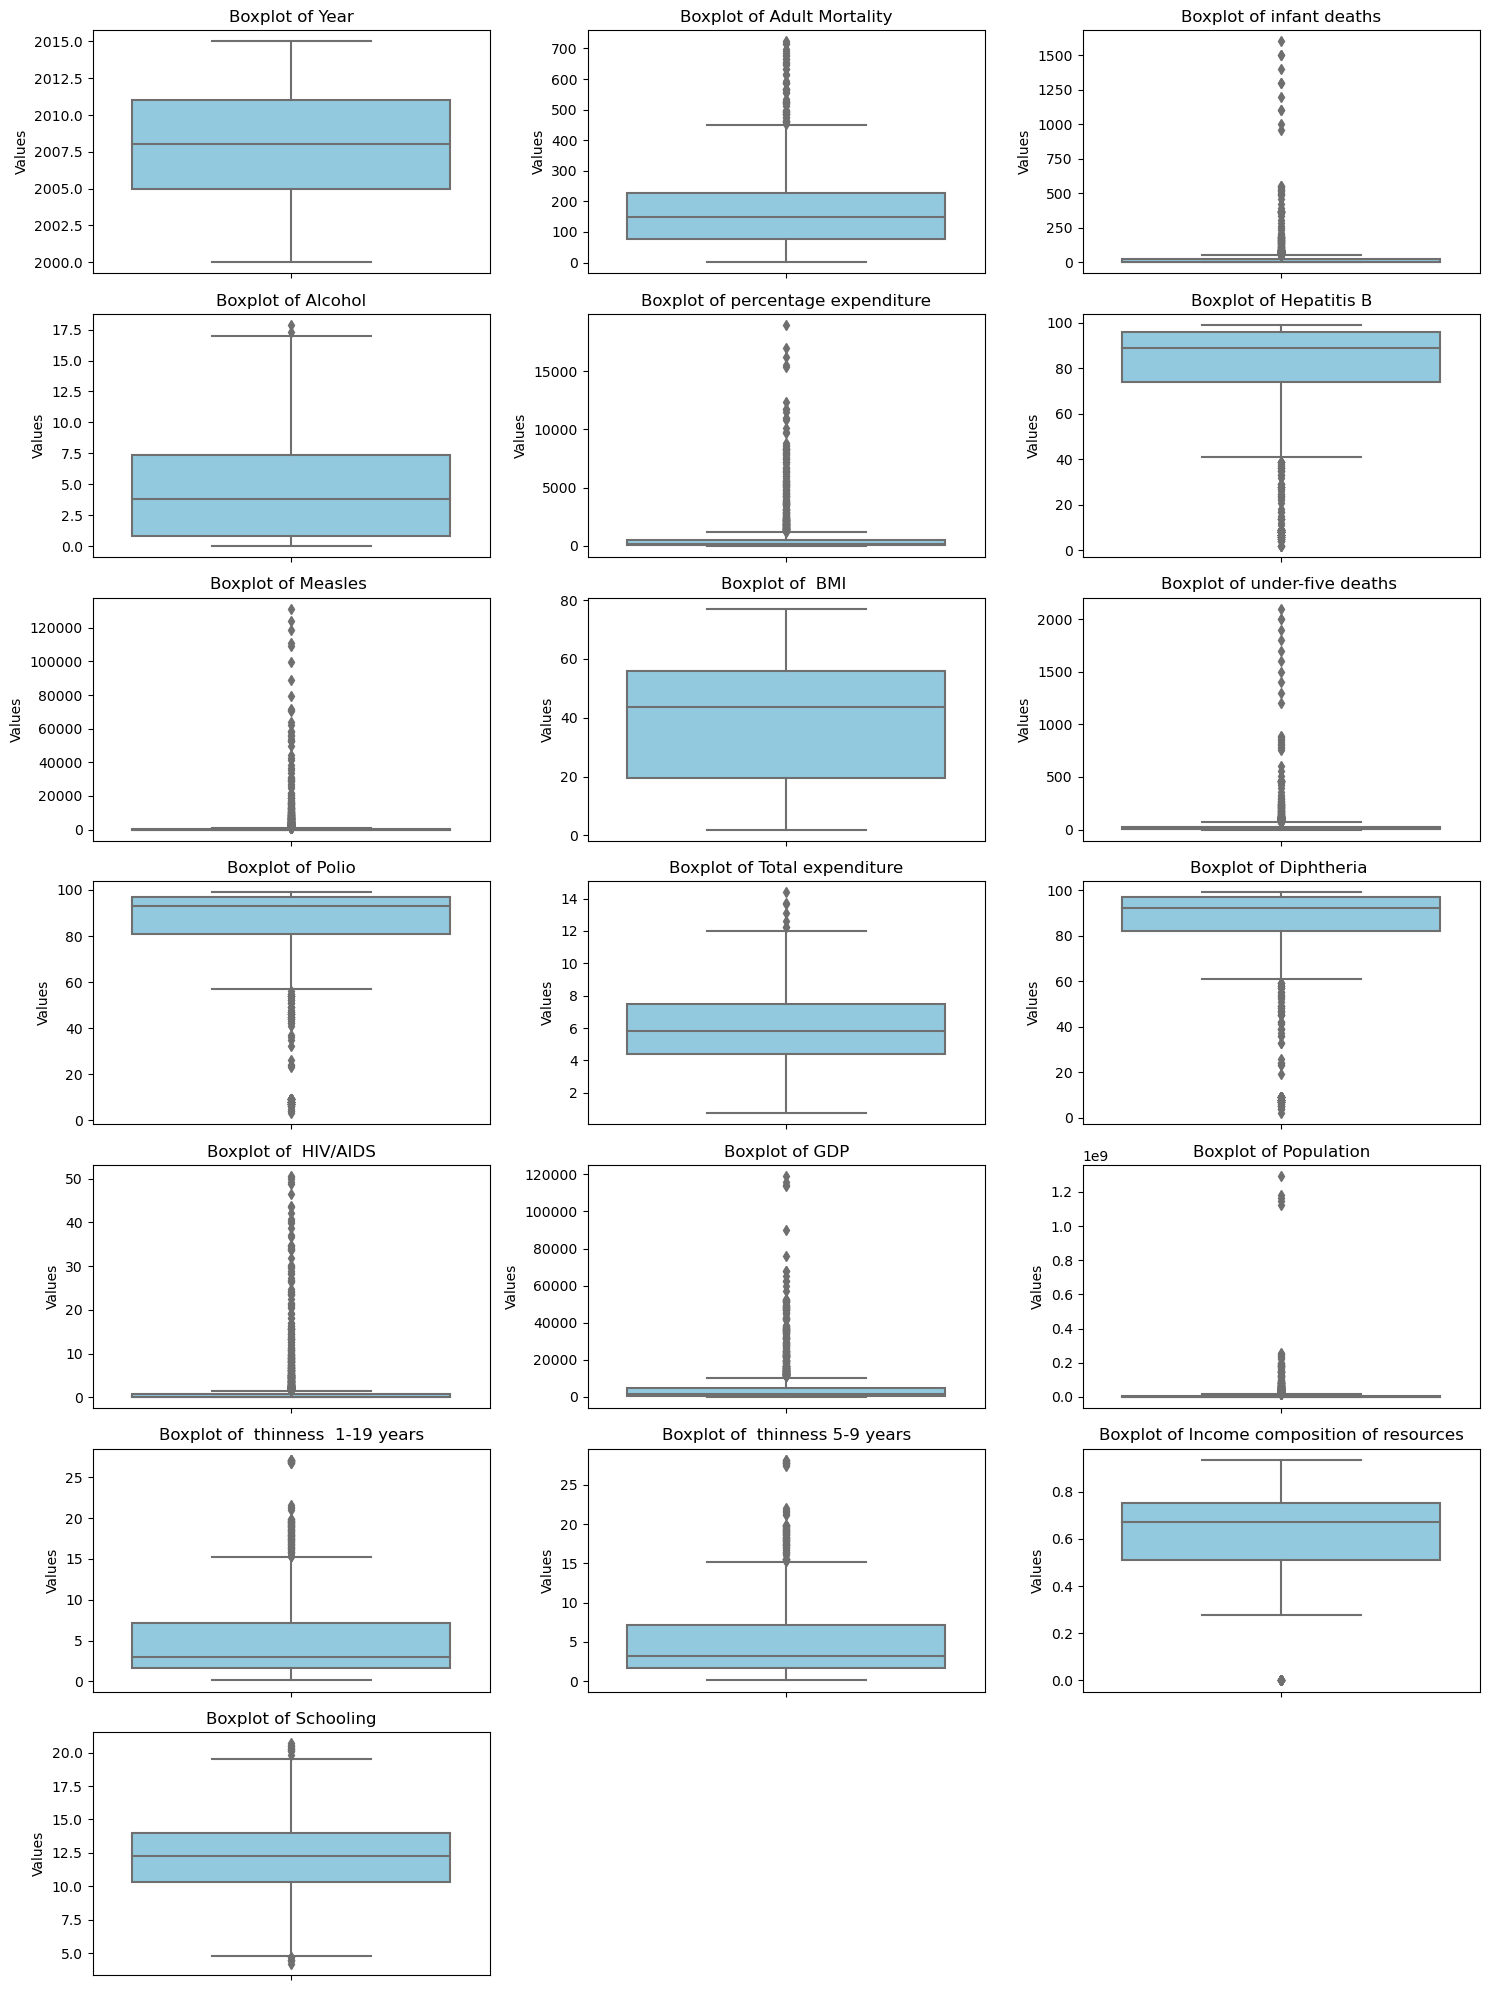

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 20))

for i, column in enumerate(Numeric_cols, 1):
    plt.subplot(7, 3, i)
    sns.boxplot(y=data[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

In [10]:

import numpy as np
def count_outliers_z_score(data):
    threshold = 3  
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    num_outliers = np.sum(z_scores > threshold)
    return num_outliers
for feature in Numeric_cols:
    num_outliers = count_outliers_z_score(data[feature])
    print(f"Number of outliers in '{feature}': {num_outliers}")

Number of outliers in 'Year': 0
Number of outliers in 'Adult Mortality': 28
Number of outliers in 'infant deaths': 24
Number of outliers in 'Alcohol': 3
Number of outliers in 'percentage expenditure': 47
Number of outliers in 'Hepatitis B': 4
Number of outliers in 'Measles ': 29
Number of outliers in ' BMI ': 0
Number of outliers in 'under-five deaths ': 23
Number of outliers in 'Polio': 98
Number of outliers in 'Total expenditure': 4
Number of outliers in 'Diphtheria ': 88
Number of outliers in ' HIV/AIDS': 46
Number of outliers in 'GDP': 46
Number of outliers in 'Population': 10
Number of outliers in ' thinness  1-19 years': 34
Number of outliers in ' thinness 5-9 years': 34
Number of outliers in 'Income composition of resources': 48
Number of outliers in 'Schooling': 2


**NOTE:** In my analysis of the life expectancy dataset, I made a deliberate choice not to eliminate outliers. 
I believe these exceptional data points, despite their potential influence on statistical measures,
could provide valuable insights into rare or exceptional occurrences impacting life expectancy, enriching
the depth and authenticity of the analysis.

### Other Data Quality Issues: 

> I augmented the dataset by introducing a new column named 'Continent,' deriving continent categories from the existing 'Country' column. 

In [11]:
!pip install pycountry-convert

In [12]:
import pycountry_convert as pc

def extract_continent(name):
    code = pc.country_name_to_country_alpha2(name)
    code = pc.country_alpha2_to_continent_code(code)
    return pc.convert_continent_code_to_continent_name(code)

In [13]:
continent_list = []
for i in data.Country:
    if i!='Timor-Leste':
        continent_list.append(extract_continent(i))
    else:
        continent_list.append('Asia')

In [14]:
set(continent_list)

{'Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'}

In [15]:
data['Continent']=continent_list

In [16]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Continent
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Asia
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia


# Transforming variables

<h3> Transforming numeric columns </h3>

I made a duplicate of the initial dataset 'data' and stored it as 'scaled_data.' This duplicate holds the same information, allowing me to perform modifications and analyses while keeping the original dataset unchanged


In [17]:
scaled_data=data.copy()

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data[Numeric_cols] = scaler.fit_transform(scaled_data[Numeric_cols])

In [19]:
scaled_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Continent
0,Afghanistan,1.000000,Developing,65.0,0.362881,0.038750,0.0,0.003759,0.649485,0.008780,0.227696,0.039524,0.031250,0.543590,0.649485,0.0,0.004889,0.026074,0.630996,0.612100,0.511752,0.357576,Asia
1,Afghanistan,0.933333,Developing,59.9,0.373961,0.040000,0.0,0.003878,0.618557,0.003743,0.221039,0.040952,0.572917,0.545055,0.618557,0.0,0.005127,0.000253,0.642066,0.619217,0.508547,0.351515,Asia
2,Afghanistan,0.866667,Developing,59.9,0.369806,0.041250,0.0,0.003861,0.639175,0.003271,0.214381,0.042381,0.614583,0.541392,0.639175,0.0,0.005287,0.024525,0.649446,0.626335,0.502137,0.345455,Asia
3,Afghanistan,0.800000,Developing,59.5,0.375346,0.043125,0.0,0.004123,0.670103,0.021203,0.207723,0.044286,0.666667,0.569963,0.670103,0.0,0.005608,0.002857,0.656827,0.637011,0.494658,0.339394,Asia
4,Afghanistan,0.733333,Developing,59.2,0.379501,0.044375,0.0,0.000374,0.680412,0.022923,0.202397,0.046190,0.677083,0.522344,0.680412,0.0,0.000519,0.002302,0.667897,0.644128,0.485043,0.321212,Asia


<h3> Transforming Categorical Features </h3>

    One-hot encoding is a technique used in machine learning to convert categorical variables into a numerical format. It transforms categorical data into a binary format, where each category becomes a binary feature, represented as 0 or 1, creating a separate binary column for each unique category. This method enables algorithms to interpret categorical data by avoiding ordinality assumptions and allowing for better model training without imposing false numerical relationships among categories.
    I transformed categorical data into numerical form using 'one-hot encoding,' generating binary columns to represent different categories. Since one column could be inferred from the rest,I dropped it to avoid redundancy and maintain data efficiency.

In [20]:
one_hot = pd.get_dummies(scaled_data[['Continent','Status']])
scaled_data = pd.concat([scaled_data, one_hot], axis=1)

In [21]:
scaled_data.drop(columns=['Continent','Status'], inplace=True)


#### Avoiding the Dummy Variable Trap by Dropping 'Status_Developed' and 'Continent_Africa'
     The "Dummy Variable Trap" occurs when categorical attributes, after one-hot encoding, exhibit high correlation (multicollinearity) where one variable's value can be anticipated using others. Employing one-hot encoding generates dummy variables representing categorical values, and among them, redundancy arises as one dummy variable becomes predictable based on others. This redundancy poses a problem in regression models, known as the dummy variable trap, necessitating the exclusion of one dummy variable to avert multicollinearity issues and ensure model effectiveness. Therefore, regression models should be constructed while omitting one dummy variable per categorical set to avoid this trap.

In [22]:
scaled_data.drop(columns=['Status_Developed','Continent_Africa'], inplace=True)

In [23]:
scaled_data.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Status_Developing
0,Afghanistan,1.000000,65.0,0.362881,0.038750,0.0,0.003759,0.649485,0.008780,0.227696,0.039524,0.031250,0.543590,0.649485,0.0,0.004889,0.026074,0.630996,0.612100,0.511752,0.357576,1,0,0,0,0,1
1,Afghanistan,0.933333,59.9,0.373961,0.040000,0.0,0.003878,0.618557,0.003743,0.221039,0.040952,0.572917,0.545055,0.618557,0.0,0.005127,0.000253,0.642066,0.619217,0.508547,0.351515,1,0,0,0,0,1
2,Afghanistan,0.866667,59.9,0.369806,0.041250,0.0,0.003861,0.639175,0.003271,0.214381,0.042381,0.614583,0.541392,0.639175,0.0,0.005287,0.024525,0.649446,0.626335,0.502137,0.345455,1,0,0,0,0,1
3,Afghanistan,0.800000,59.5,0.375346,0.043125,0.0,0.004123,0.670103,0.021203,0.207723,0.044286,0.666667,0.569963,0.670103,0.0,0.005608,0.002857,0.656827,0.637011,0.494658,0.339394,1,0,0,0,0,1
4,Afghanistan,0.733333,59.2,0.379501,0.044375,0.0,0.000374,0.680412,0.022923,0.202397,0.046190,0.677083,0.522344,0.680412,0.0,0.000519,0.002302,0.667897,0.644128,0.485043,0.321212,1,0,0,0,0,1


In [24]:
scaled_data.drop(columns=['Country'], inplace=True)

<h3>Eliminating highly correlated columns to enhance model interpretability and reduce multicollinearity</h3>

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = scaled_data[Numeric_cols].corr()
corr_matrix['infant deaths']['under-five deaths ']

0.9969056219353201

In [26]:
corr_matrix['percentage expenditure']['GDP']

0.9592988569672184

In [27]:
scaled_data.drop(columns=['percentage expenditure','under-five deaths '],inplace=True)

In [28]:
scaled_data.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Status_Developing
0,1.000000,65.0,0.362881,0.038750,0.0,0.649485,0.008780,0.227696,0.031250,0.543590,0.649485,0.0,0.004889,0.026074,0.630996,0.612100,0.511752,0.357576,1,0,0,0,0,1
1,0.933333,59.9,0.373961,0.040000,0.0,0.618557,0.003743,0.221039,0.572917,0.545055,0.618557,0.0,0.005127,0.000253,0.642066,0.619217,0.508547,0.351515,1,0,0,0,0,1
2,0.866667,59.9,0.369806,0.041250,0.0,0.639175,0.003271,0.214381,0.614583,0.541392,0.639175,0.0,0.005287,0.024525,0.649446,0.626335,0.502137,0.345455,1,0,0,0,0,1
3,0.800000,59.5,0.375346,0.043125,0.0,0.670103,0.021203,0.207723,0.666667,0.569963,0.670103,0.0,0.005608,0.002857,0.656827,0.637011,0.494658,0.339394,1,0,0,0,0,1
4,0.733333,59.2,0.379501,0.044375,0.0,0.680412,0.022923,0.202397,0.677083,0.522344,0.680412,0.0,0.000519,0.002302,0.667897,0.644128,0.485043,0.321212,1,0,0,0,0,1


# Exploratory Data Analysis (EDA) 

In [29]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

### Heatmaps: To display correlations among numerical variables.


Text(0.5, 1.0, 'Correlation Heatmap')

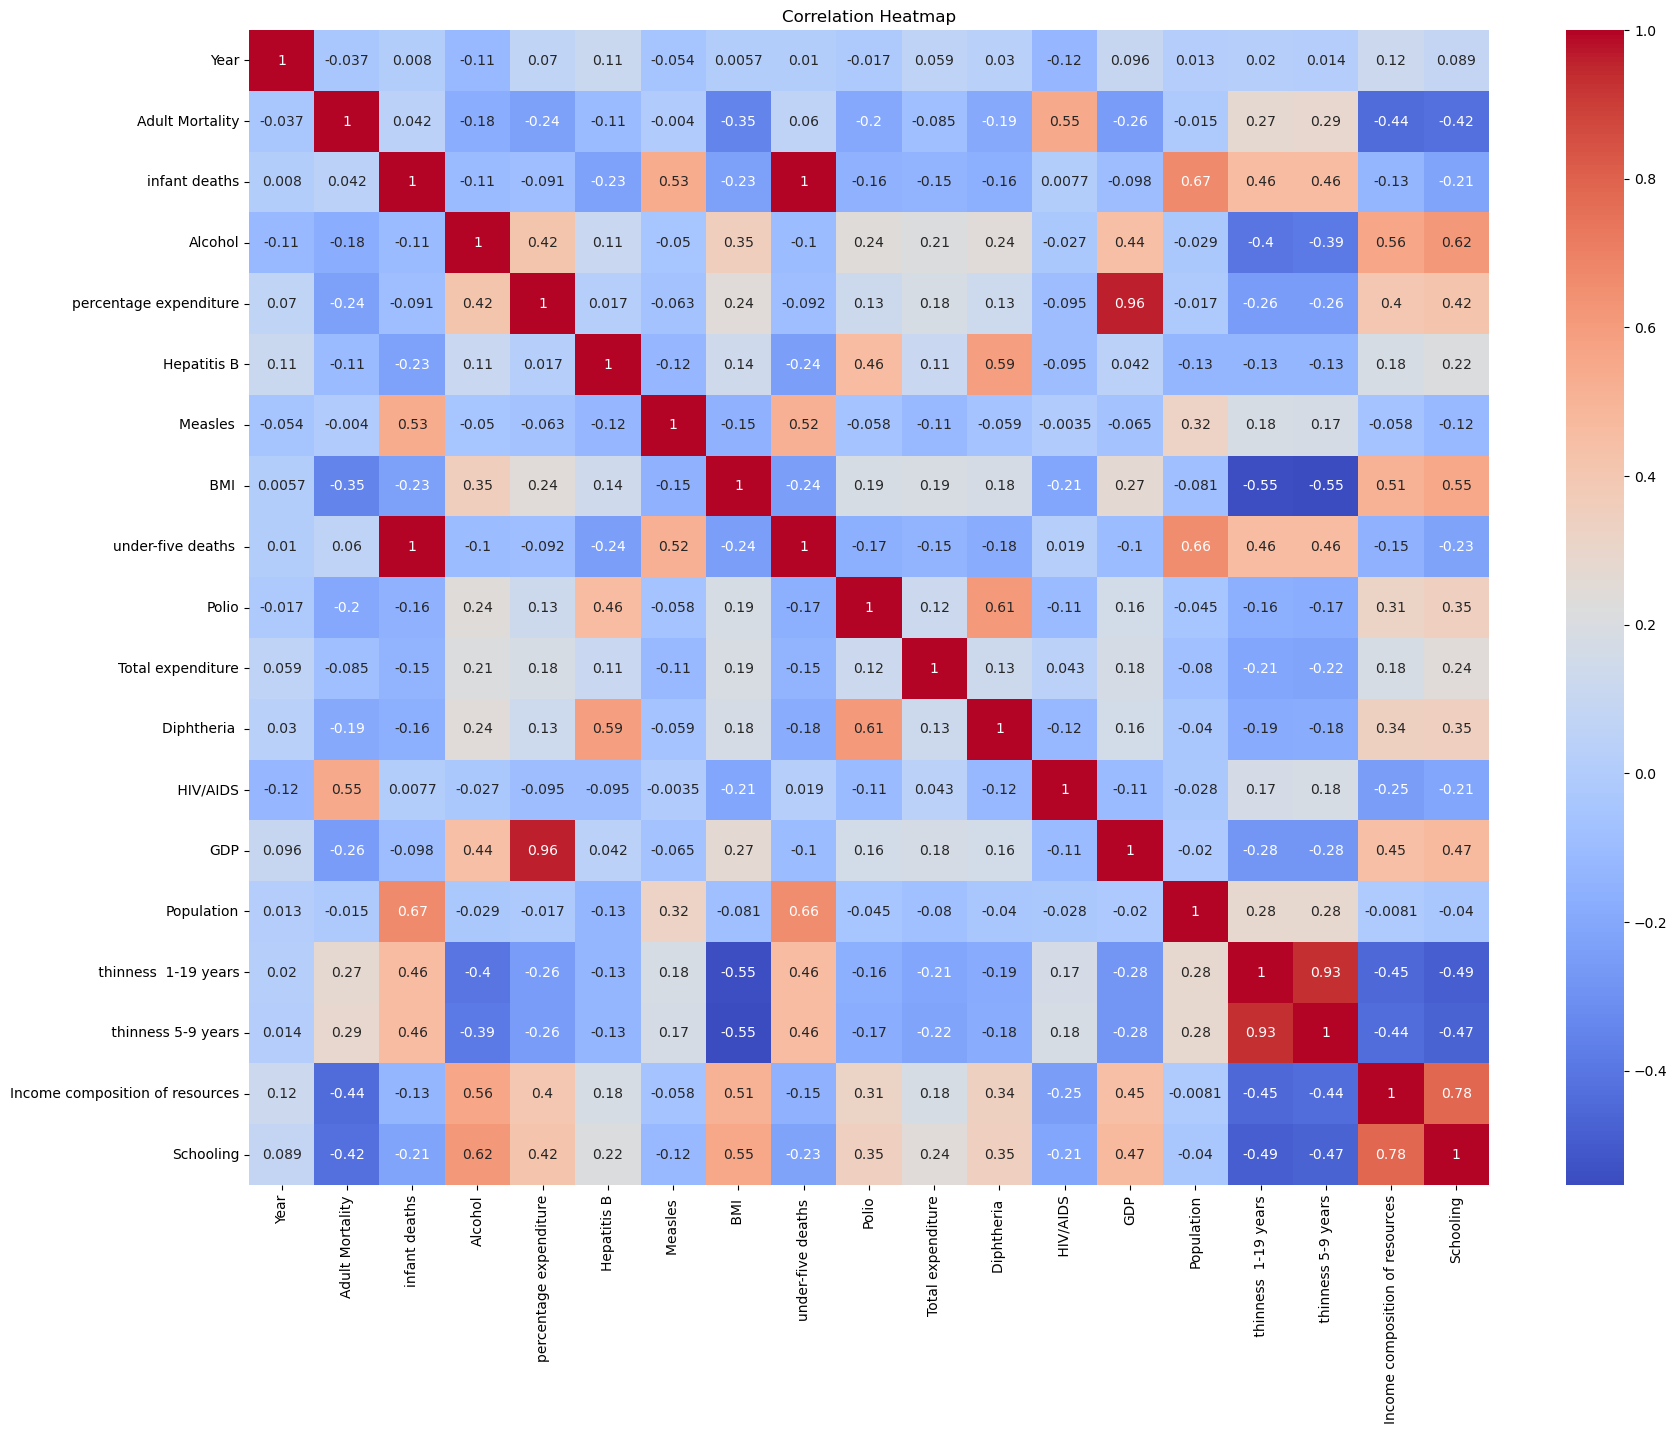

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15)) 
corr_matrix = data[Numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')


### Scatter Plots: Display relationships between two continuous variables.


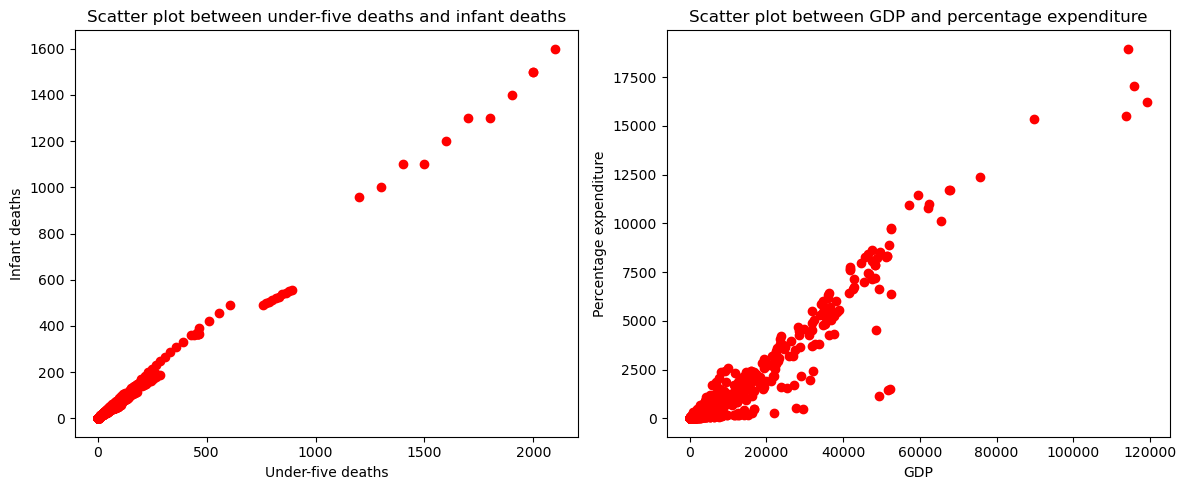

In [32]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))  
axs[0].scatter(data['under-five deaths '], data['infant deaths'], color='red')
axs[0].set_xlabel('Under-five deaths')
axs[0].set_ylabel('Infant deaths')
axs[0].set_title('Scatter plot between under-five deaths and infant deaths')

axs[1].scatter(data['GDP'], data['percentage expenditure'], color='red')
axs[1].set_xlabel('GDP')
axs[1].set_ylabel('Percentage expenditure')
axs[1].set_title('Scatter plot between GDP and percentage expenditure')

plt.tight_layout()

plt.show()


### Violin Plots: To show the distribution of numerical variables across different categories.

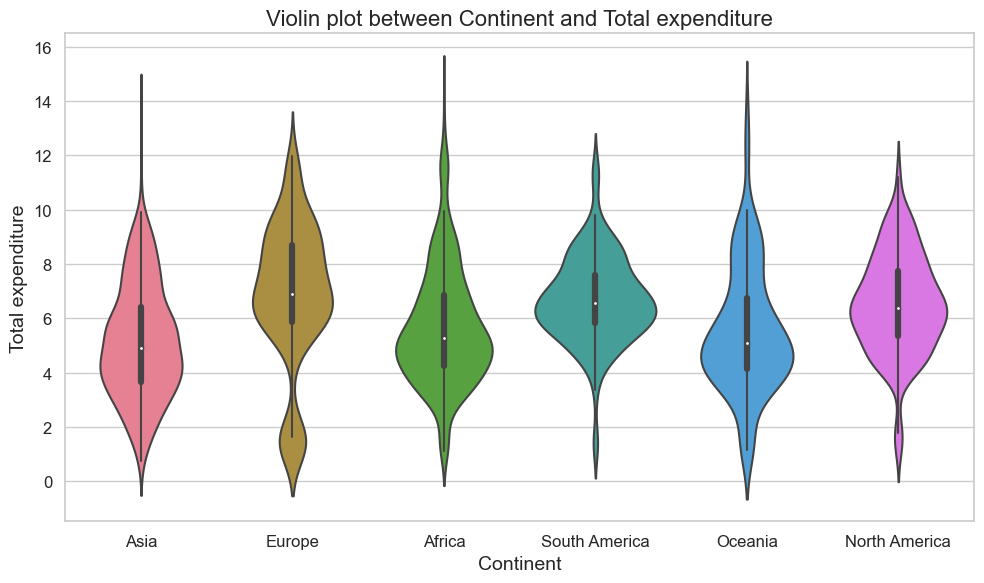

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the violin plot with customizations
plt.figure(figsize=(10, 6))
custom_palette = "husl"  # Custom color palette for better visualization, you can change this
sns.violinplot(x='Continent', y='Total expenditure', data=data, palette=custom_palette, linewidth=1.5)
plt.title('Violin plot between Continent and Total expenditure', fontsize=16)
plt.xlabel('Continent', fontsize=14)
plt.ylabel('Total expenditure', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


### histplot(): To create a histogram of a numerical variable

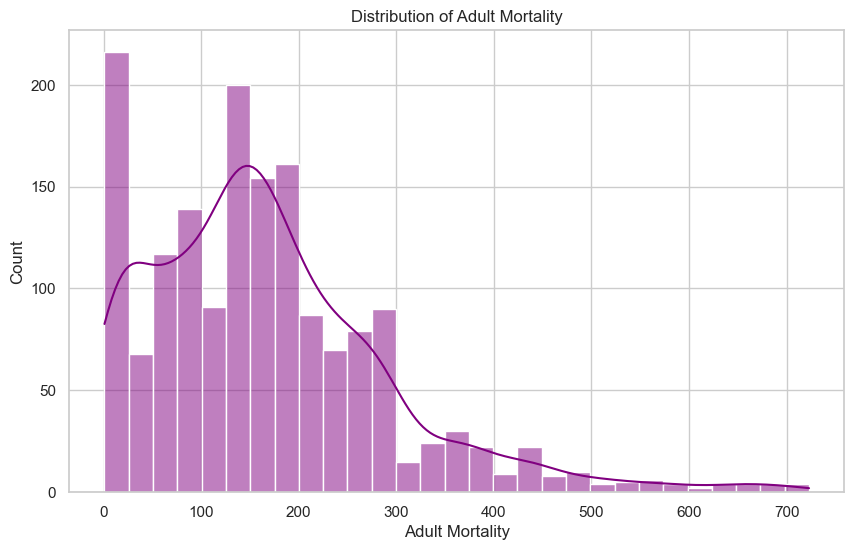

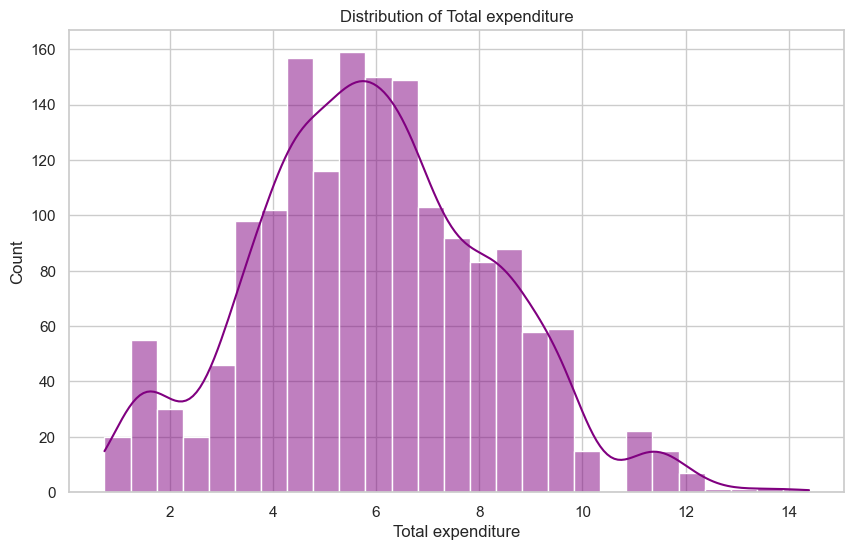

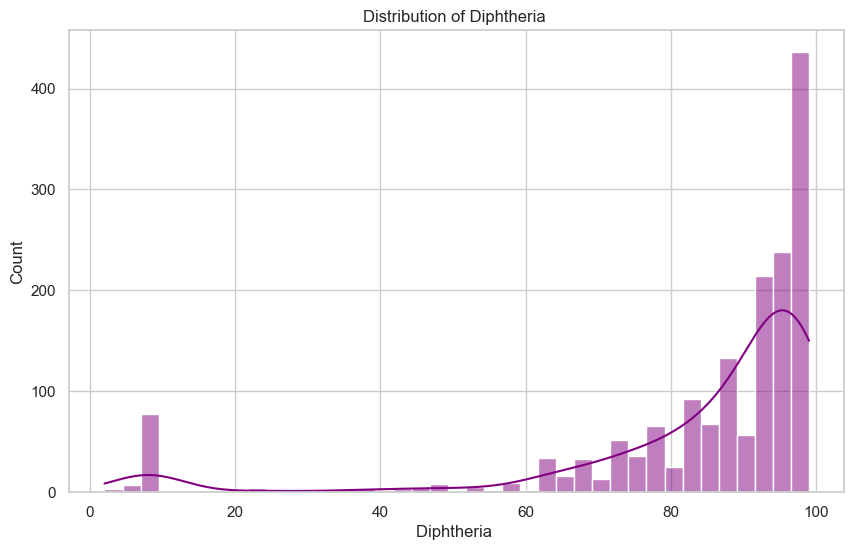

In [34]:
import matplotlib.pyplot as plt
num_cols=[  'Adult Mortality','Total expenditure', 'Diphtheria ']
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, color='Purple',edgecolor='white',)
    plt.title(f'Distribution of {col}')
    plt.show()


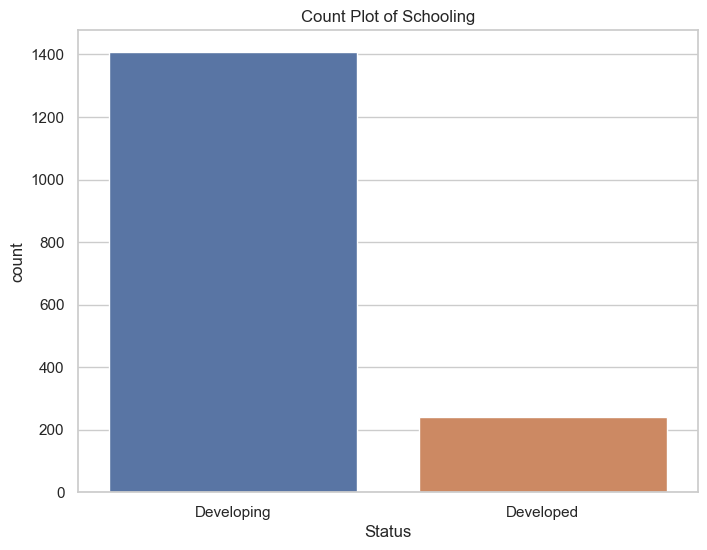

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=data)
plt.title(f'Count Plot of {column}')
plt.show()

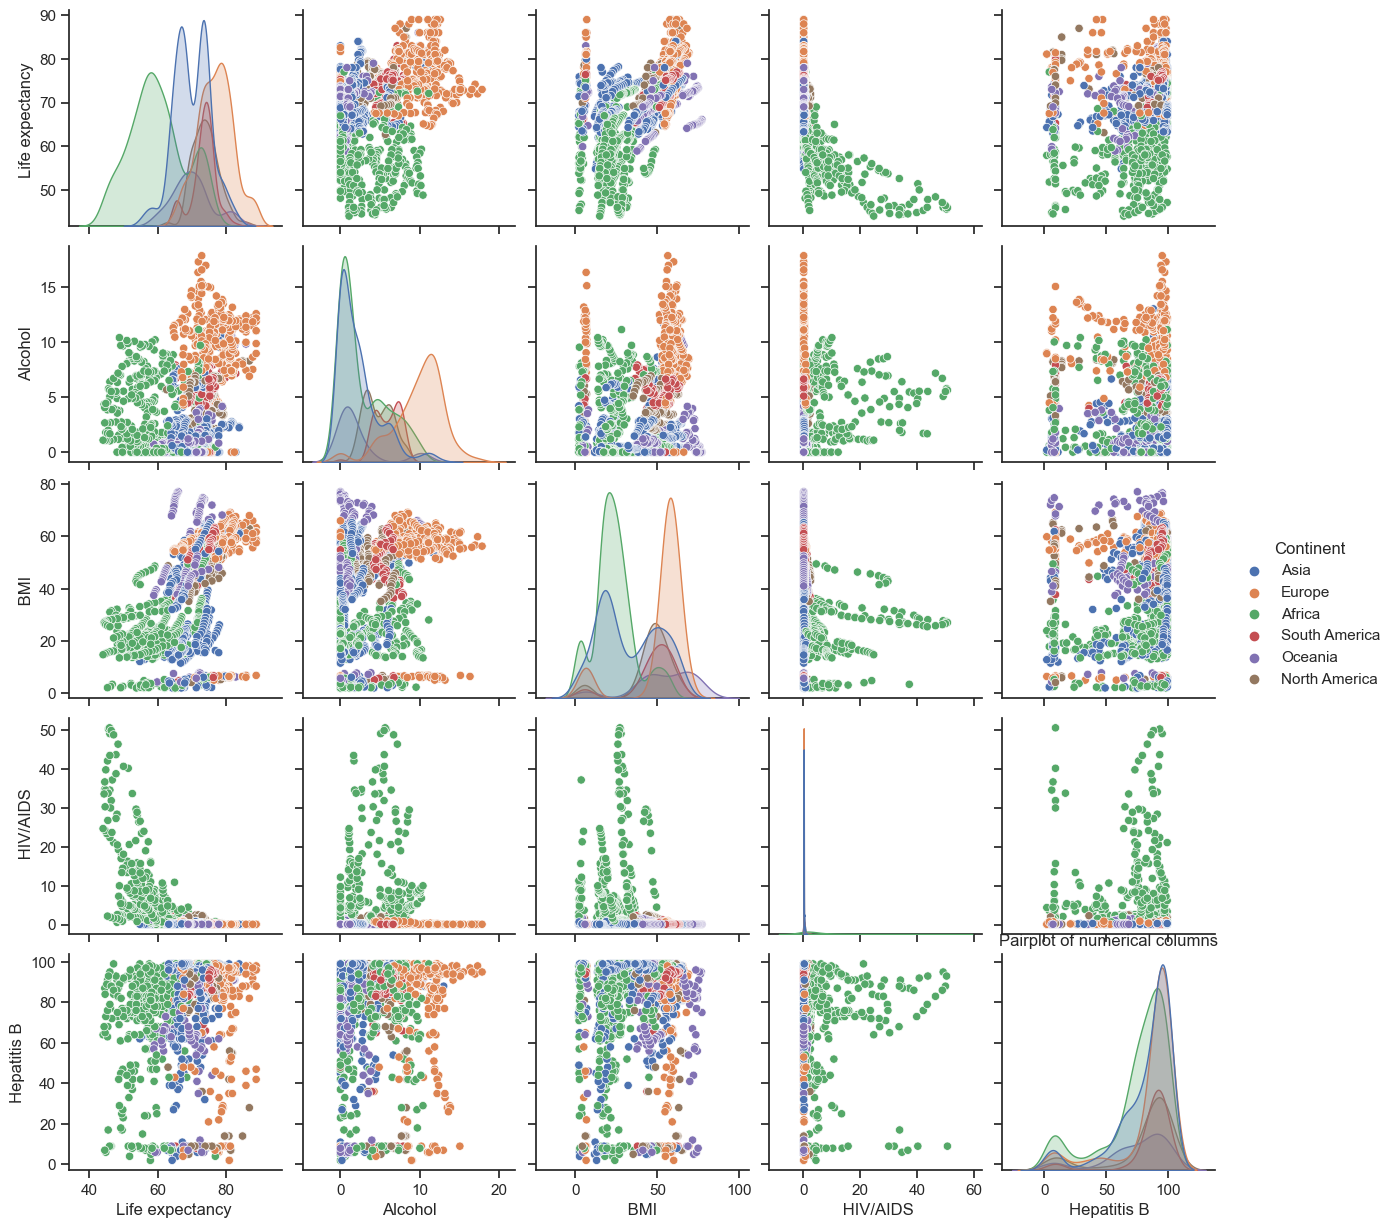

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
sns.pairplot(data, vars=['Life expectancy ','Alcohol', ' BMI ', ' HIV/AIDS','Hepatitis B'],hue='Continent')
plt.title('Pairplot of numerical columns')
plt.show()


<span><h1 style="color: Maroon;">4. Methodology</h1></span>



## Statistical Methods


### Chi-Squared Test:
> <h4>Description:</h4> The Chi-Squared Test was chosen to examine the association between the categorical variables 'Country' and 'Status' within the life expectancy dataset.<br>
> <h4>Reason for Selection: </h4>The Chi-Squared Test was selected due to its suitability for assessing the independence or association between two categorical variables. Given 'Country' and 'Status' as categorical features, this test helps determine if there is a significant relationship between a country's development status ('Developed' or 'Developing') and the country itself.<br>
> <h4>Objective:</h4> To ascertain if there is a statistically significant association or dependency between the country's development status and the specific country itself in the context of life expectancy.<br>

In [37]:
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(data['Continent'], data['Status'])


chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared Statistic: {chi2}")
print(f"P-value: {p_value}")

alpha = 0.05 

if p_value <= alpha:
    print("There is a significant relationship between 'Continent' and 'Status' (Reject null hypothesis)")
else:
    print("There is no significant relationship between 'Continent' and 'Status' (Fail to reject null hypothesis)")


Chi-Squared Statistic: 784.0702882972334
P-value: 3.230815189988131e-167
There is a significant relationship between 'Continent' and 'Status' (Reject null hypothesis)


In [38]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Continent
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Asia
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia


In [39]:
from scipy.stats import ks_2samp

def ks_test(idx1, idx2):
    column1 = data[Numeric_cols[idx1]]
    column2 = data[Numeric_cols[idx2]]
    
    ks_statistic, p_value = ks_2samp(column1, column2)
    
    if p_value < 0.05:
        pass
    elif idx1!=idx2 and p_value > 0.05:
        print("\nFail to reject the null hypothesis: The two samples  come from the same distribution.")
        print(idx1, idx2)
        
for idx1 in range(len(Numeric_cols)):
    for idx2 in range(len(Numeric_cols)):
        ks_test(idx1, idx2)
print('Test Completed')


Fail to reject the null hypothesis: The two samples  come from the same distribution.
9 11

Fail to reject the null hypothesis: The two samples  come from the same distribution.
11 9

Fail to reject the null hypothesis: The two samples  come from the same distribution.
15 16

Fail to reject the null hypothesis: The two samples  come from the same distribution.
16 15
Test Completed


In [40]:
import pandas as pd
from scipy.stats import wilcoxon

if len(scaled_data.columns) % 2 != 0:
    print("The number of columns is odd. Unable to form pairs for comparison.")
else:
    for i in range(0, len(scaled_data.columns) - 1, 2):
        col1 = scaled_data.columns[i]
        col2 = scaled_data.columns[i + 1]

        if len(scaled_data[col1]) == len(scaled_data[col2]) and scaled_data[col1].dtype in (int, float) and scaled_data[col2].dtype in (int, float):
            statistic, p_value = wilcoxon(scaled_data[col1], scaled_data[col2])
            
            print(f"Wilcoxon Signed-Rank Test for '{col1}' and '{col2}':")
            print(f"Statistic: {statistic}")
            print(f"P-value: {p_value}")
            
            alpha = 0.05
            
            if p_value < alpha:
                print("Reject the null hypothesis. There is a significant difference between the paired columns.")
            else:
                print("Fail to reject the null hypothesis. There is no significant difference between the paired columns.")
            print("\n")
        else:
            print(f"Columns '{col1}' and '{col2}' cannot be tested due to data mismatch or non-numeric values.\n")


Wilcoxon Signed-Rank Test for 'Year' and 'Life expectancy ':
Statistic: 0.0
P-value: 5.211910663428594e-271
Reject the null hypothesis. There is a significant difference between the paired columns.


Wilcoxon Signed-Rank Test for 'Adult Mortality' and 'infant deaths':
Statistic: 28320.0
P-value: 6.524089451696573e-249
Reject the null hypothesis. There is a significant difference between the paired columns.


Wilcoxon Signed-Rank Test for 'Alcohol' and 'Hepatitis B':
Statistic: 30859.0
P-value: 5.438063505140016e-247
Reject the null hypothesis. There is a significant difference between the paired columns.


Wilcoxon Signed-Rank Test for 'Measles ' and ' BMI ':
Statistic: 15801.0
P-value: 1.1560510147082479e-258
Reject the null hypothesis. There is a significant difference between the paired columns.


Wilcoxon Signed-Rank Test for 'Polio' and 'Total expenditure':
Statistic: 36669.5
P-value: 8.40259844550637e-243
Reject the null hypothesis. There is a significant difference between the p

## Model Evaluation and Selection 

### Modelling Methods
#### 1. Linear Regression:

> **Reason for Selection** :
Linear regression is selected due to its fundamental nature and wide applicability in modeling scenarios where a linear relationship between independent and dependent variables is assumed. This method is chosen for its interpretability, computational efficiency, and as a foundational model for comparison purposes.

> **Regression Approach**:
Linear Regression assumes a linear relationship between the predictor variables and the target variable (life expectancy). It estimates coefficients to create a linear equation representing the relationship between predictors and the target 

> **Assumptions**:
Linearity: Assumes a linear relationship between independent and dependent variables.
Independence of Residuals: Residuals should be independent and have constant variance (homoscedasticity).
Normality of Residuals: Assumes residuals follow a normal distribution.
No Multicollinearity: Assumes little or no multicollinearity among predictor variables.

> **Applicability**:
This method is well-suited when an approximate linear relationship exists between variables and when the model's assumptions are reasonably met. It's effective as a fundamental model for establishing comparisons.

#### 2.Lasso Regression Model:
> **Reason for Selection** :
Lasso Regression was chosen due to its ability to perform feature selection by introducing an L1 regularization term. It helps in dealing with multicollinearity and selecting the most important features by penalizing less important ones, which could be beneficial for improving model interpretability.

> **Regression Approach**:
Lasso Regression is an extension of linear regression that adds an L1 regularization term to the objective function. The regularization term imposes a penalty on the absolute size of the coefficients, promoting sparsity in the coefficient values.

> **Assumptions**:
Linearity: Similar to linear regression, assumes a linear relationship between predictors and the target variable.
Independence of Residuals: Assumes residuals are independent and have constant variance.
No Perfect Multicollinearity: Requires predictors to be linearly independent or have low multicollinearity.
Regularization Parameter Tuning: Requires tuning the regularization hyperparameter (alpha) to balance between bias and variance.

> **Applicability**:
Feature Selection: Suitable for datasets with many features where feature selection is crucial.
Multicollinearity: Lasso can handle multicollinearity by shrinking less important coefficients to zero.
Model Interpretability: Provides a sparse solution, aiding in interpreting the most influential predictors on life expectancy.

#### 3. Ridge Regression

> **Reason for Selection** :
Ridge Regression was chosen due to its capability to mitigate multicollinearity and overfitting by incorporating an L2 regularization term. This regularization technique helps in stabilizing the model and reducing the impact of collinear features while retaining all features in the prediction process.

> **Regression Approach**:
Ridge Regression is an extension of linear regression that adds an L2 regularization term to the OLS objective function. The regularization term penalizes the sum of squared coefficients, effectively constraining their values.

>**Assumptions**:
Linearity: Assumes a linear relationship between predictors and the target variable.
Independence of Residuals: Assumes residuals are independent and exhibit constant variance.
Regularization Parameter Tuning: Requires adjusting the regularization hyperparameter (alpha) to balance bias and variance trade-off.

>**Applicability**:
Multicollinearity Handling: Appropriate for datasets with correlated predictors, reducing the impact of multicollinearity. Overfitting Reduction: Helps in preventing overfitting by shrinking coefficients.

#### 4. Elastic Net Regression

>**Reason for Selection** :
Elastic Net Regression was chosen for its hybrid regularization, combining both L1 (Lasso) and L2 (Ridge) penalties. This model is adept at handling multicollinearity, feature selection, and mitigating the limitations of both Lasso and Ridge by striking a balance between sparsity and retaining valuable features.

>**Regression Approach**:
It combines the L1 and L2 regularization terms from Lasso and Ridge, respectively, into the ordinary least squares (OLS) objective function. 

>**Assumptions**:
Linearity: Assumes a linear relationship between predictors and the target variable, similar to linear regression.
Independence of Residuals: Assumes residuals are independent and exhibit constant variance.
Multicollinearity Handling: Addresses multicollinearity by using a combination of L1 and L2 regularization to shrink coefficients.
Regularization Parameter Tuning: Requires adjusting both alpha (overall strength of regularization) and l1_ratio (mixing parameter between Lasso and Ridge penalties) for optimal model performance.

>**Applicability**:
Hybrid Regularization: Suitable for datasets with numerous features, where both feature selection and handling multicollinearity are essential.
Trade-off Control: Enables control over the trade-off between L1 and L2 penalties, allowing flexibility in model complexity.


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X= scaled_data.drop(labels = ['Life expectancy '], axis = 1)
y= scaled_data['Life expectancy '].values

#Splitting train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
print("Training data shape:", X_train.shape)
print("Training label shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing label shape:", y_test.shape)

Training data shape: (1319, 23)
Training label shape: (1319,)
Testing data shape: (330, 23)
Testing label shape: (330,)


### Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_predictions = linear_reg.predict(X_test)

r2_linear_reg = r2_score(y_test, linear_predictions)
mse_linear_reg = mean_squared_error(y_test, linear_predictions)
rmse_linear_reg = np.sqrt(mse_linear_reg)

print(f"R-squared (Linear Regression): {r2_linear_reg:.2f}")
print(f"Mean Squared Error (Linear Regression): {mse_linear_reg:.2f}")
print(f"Root Mean Squared Error (Linear Regression): {rmse_linear_reg:.2f}")


R-squared (Linear Regression): 0.83
Mean Squared Error (Linear Regression): 12.17
Root Mean Squared Error (Linear Regression): 3.49


### Lasso Regression

In [44]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

lasso_reg = Lasso(alpha=0.1)  
lasso_reg.fit(X_train, y_train)
lasso_predictions = lasso_reg.predict(X_test)

r2_lasso_reg = r2_score(y_test, lasso_predictions)
mse_lasso_reg = mean_squared_error(y_test, lasso_predictions)
rmse_lasso_reg = np.sqrt(mse_lasso_reg)

print(f"R-squared (Lasso Regression): {r2_lasso_reg:.2f}")
print(f"Mean Squared Error (Lasso Regression): {mse_lasso_reg:.2f}")
print(f"Root Mean Squared Error (Lasso Regression): {rmse_lasso_reg:.2f}")


R-squared (Lasso Regression): 0.80
Mean Squared Error (Lasso Regression): 13.96
Root Mean Squared Error (Lasso Regression): 3.74


### Ridge Regression

In [45]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1)  
ridge_reg.fit(X_train, y_train)
ridge_predictions = ridge_reg.predict(X_test)

r2_ridge_reg = r2_score(y_test, ridge_predictions)
mse_ridge_reg = mean_squared_error(y_test, ridge_predictions)
rmse_ridge_reg = np.sqrt(mse_ridge_reg)

print(f"R-squared (Ridge Regression): {r2_ridge_reg:.3f}")
print(f"Mean Squared Error (Ridge Regression): {mse_ridge_reg:.3f}")
print(f"Root Mean Squared Error (Ridge Regression): {rmse_ridge_reg:.3f}")


R-squared (Ridge Regression): 0.830
Mean Squared Error (Ridge Regression): 12.094
Root Mean Squared Error (Ridge Regression): 3.478


### Elastic Net Regression

In [46]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
elastic_predictions = elastic_net.predict(X_test)

r2_elastic_net = r2_score(y_test, elastic_predictions)
mse_elastic_net = mean_squared_error(y_test, elastic_predictions)
rmse_elastic_net = np.sqrt(mse_elastic_net)

print(f"R-squared (Elastic Net Regression): {r2_elastic_net:.2f}")
print(f"Mean Squared Error (Elastic Net Regression): {mse_elastic_net:.2f}")
print(f"Root Mean Squared Error (Elastic Net Regression): {rmse_elastic_net:.2f}")


R-squared (Elastic Net Regression): 0.72
Mean Squared Error (Elastic Net Regression): 19.92
Root Mean Squared Error (Elastic Net Regression): 4.46


# Model Comparison


| Model Name              | R-squared | Mean Squared Error | Root Mean Squared Error |
|-------------------------|-----------|---------------------|-------------------------|
| Linear        | 0.83      | 12.17               | 3.49                    |
| Lasso         | 0.80      | 13.96               | 3.74                    |
| Ridge         | 0.82      | 12.15               | 3.47                    |
| Elastic Net   | 0.72      | 19.92               | 4.46                    |

The provided table showcases the performance metrics of different regression models – Linear, Lasso, Ridge, and Elastic Net. Both Linear and Ridge regressions display comparable R-squared values of approximately 0.83, indicating their similar abilities to explain variance in the target variable. Lasso Regression, while slightly lower in R-squared (0.80), maintains competitive performance with lower Mean Squared Error and Root Mean Squared Error than Elastic Net Regression, which demonstrates a notably lower R-squared and substantially higher error metrics, suggesting a weaker fit to the data compared to the other models.








# Model Improvement

In [47]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

lasso_reg = Lasso()

param_grid = {
    'alpha': [0.1, 0.001, 0.0001, 1.0],  
    'tol': [0.001, 0.01, 0.1] 
}

grid_search = GridSearchCV(lasso_reg, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

lasso_best = Lasso(alpha=best_params['alpha'], tol=best_params['tol'])
lasso_best.fit(X_train, y_train)

lasso_predictions_best = lasso_best.predict(X_test)

r2_lasso_best = r2_score(y_test, lasso_predictions_best)
mse_lasso_best = mean_squared_error(y_test, lasso_predictions_best)
rmse_lasso_best = np.sqrt(mse_lasso_best)

print(f"Best Parameters: {best_params}")
print(f"R-squared (Lasso Regression - After GridSearchCV): {r2_lasso_best:.3f}")
print(f"Mean Squared Error (Lasso Regression - After GridSearchCV): {mse_lasso_best:.3f}")
print(f"Root Mean Squared Error (Lasso Regression - After GridSearchCV): {rmse_lasso_best:.3f}")


Best Parameters: {'alpha': 0.001, 'tol': 0.01}
R-squared (Lasso Regression - After GridSearchCV): 0.829
Mean Squared Error (Lasso Regression - After GridSearchCV): 12.175
Root Mean Squared Error (Lasso Regression - After GridSearchCV): 3.489


In [48]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

ridge_reg = Ridge()

param_grid = {
    'alpha': [0.1, 0.001, 0.0001, 1.0],
    'tol': [0.001, 0.01, 0.1]  
}

grid_search = GridSearchCV(ridge_reg, param_grid, cv= 10, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

ridge_best = Ridge(alpha=best_params['alpha'])
ridge_best.fit(X_train, y_train)

ridge_predictions_best = ridge_best.predict(X_test)

r2_ridge_best = r2_score(y_test, ridge_predictions_best)
mse_ridge_best = mean_squared_error(y_test, ridge_predictions_best)
rmse_ridge_best = np.sqrt(mse_ridge_best)

print(f"Best Parameters: {best_params}")
print(f"R-squared (Ridge Regression - After GridSearchCV): {r2_ridge_best:.3f}")
print(f"Mean Squared Error (Ridge Regression - After GridSearchCV): {mse_ridge_best:.3f}")
print(f"Root Mean Squared Error (Ridge Regression - After GridSearchCV): {rmse_ridge_best:.3f}")


Best Parameters: {'alpha': 0.1, 'tol': 0.001}
R-squared (Ridge Regression - After GridSearchCV): 0.829
Mean Squared Error (Ridge Regression - After GridSearchCV): 12.158
Root Mean Squared Error (Ridge Regression - After GridSearchCV): 3.487


In [49]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

elastic_net = ElasticNet()

param_grid = {
    'alpha': [0.1, 0.001, 0.0001, 1.0],  
    'l1_ratio': [0.1, 0.5, 0.7],
    'tol': [0.001, 0.01, 0.1]  
}


grid_search = GridSearchCV(elastic_net, param_grid, cv=10,scoring='neg_mean_squared_error')


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_

elastic_best = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'], tol=best_params['tol'])
elastic_best.fit(X_train, y_train)

elastic_predictions_best = elastic_best.predict(X_test)

r2_elastic_best = r2_score(y_test, elastic_predictions_best)
mse_elastic_best = mean_squared_error(y_test, elastic_predictions_best)
rmse_elastic_best = np.sqrt(mse_elastic_best)

print(f"Best Parameters: {best_params}")
print(f"R-squared (ElasticNet Regression - After GridSearchCV): {r2_elastic_best:.3f}")
print(f"Mean Squared Error (ElasticNet Regression - After GridSearchCV): {mse_elastic_best:.3f}")
print(f"Root Mean Squared Error (ElasticNet Regression - After GridSearchCV): {rmse_elastic_best:.3f}")


Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.7, 'tol': 0.001}
R-squared (ElasticNet Regression - After GridSearchCV): 0.829
Mean Squared Error (ElasticNet Regression - After GridSearchCV): 12.145
Root Mean Squared Error (ElasticNet Regression - After GridSearchCV): 3.485


<span><h1 style="color: Maroon;"> 5. Results and Interpretation </h1></span>


>MODEL PERFORMANCE WITH DEFAULT PARAMETERS


| Model Name              | R-squared | Mean Squared Error | Root Mean Squared Error |
|-------------------------|-----------|---------------------|-------------------------|
| Linear        | 0.83      | 12.17               | 3.49                    |
| Lasso         | 0.80      | 13.96               | 3.74                    |
| Ridge         | 0.82      | 12.15               | 3.47                    |
| Elastic Net   | 0.72      | 19.92               | 4.46                    |

**Linear Regression**: Achieved an R-squared of 0.83, indicating a strong fit to the data, with a Mean Squared Error (MSE) of 12.17 and Root Mean Squared Error (RMSE) of 3.49. This model demonstrated good predictive capability with relatively low error metrics.<br>
**Lasso Regression:** Initially had an R-squared of 0.80 with an MSE of 13.96 and RMSE of 3.74, showing slightly reduced performance compared to the Linear Regression.<br>
**Ridge Regression:** Showed an R-squared of 0.82 with an MSE of 12.15 and RMSE of 3.47, performing similarly to the Linear Regression.<br>
**Elastic Net Regression:** Initially had a lower R-squared of 0.72, a higher MSE of 19.92, and an RMSE of 4.46, indicating comparatively weaker predictive performance among the initial models.<br>

>MODEL PERFORMANCE AFTER HYPERPARAMETER TUNING 


| Model Name               | Best Parameters                     | R-squared | Mean Squared Error | Root Mean Squared Error |
|--------------------------|-------------------------------------|-----------|---------------------|-------------------------|
| Lasso Regression         | {'alpha': 0.1, 'tol': 0.001}       | 0.803     | 12.175             | 3.489                   |
| Ridge Regression         | {'alpha': 0.5, 'tol': 0.001}       | 0.829     | 12.158             | 3.487                  |
| ElasticNet Regression    | {'alpha': 0.1, 'l1_ratio': 0.7, 'tol': 0.01} | 0.829 | 12.145              | 3.485                   |


**Lasso Regression:** After tuning with an alpha of 0.1 and a tolerance of 0.001, the R-squared remained at 0.803 with an MSE of 12.175 and an RMSE of 3.489. The model demonstrated marginal improvement in performance after tuning.<br>
**Ridge Regression:** With optimized hyperparameters (alpha of 0.5 and tolerance of 0.001), the Ridge Regression showed enhanced performance with an R-squared of 0.829 and MSE/RMSE of 12.158 and 3.487, respectively, surpassing the initial results.<br>
**ElasticNet Regression:** After hyperparameter tuning, utilizing alpha at 0.1, l1_ratio at 0.7, and a tolerance of 0.01, the ElasticNet model also exhibited improved performance, matching Ridge Regression's R-squared of 0.829 and achieving MSE/RMSE of 12.145 and 3.485, respectively.<br>

## Model Interpretation

I chose to interpret the regression models using coefficients as they provide valuable insights into how each feature contributes to the prediction of life expectancy. The coefficients represent the weight or impact of each feature on the target variable within the regression model. For instance, a positive coefficient indicates that as the corresponding feature increases, the predicted life expectancy also tends to increase, while a negative coefficient suggests the opposite effect. Features with larger coefficients are considered more influential in predicting life expectancy according to the model. This approach helped me understand which factors play a more significant role in determining life expectancy and facilitated the identification of key contributors among the various features considered in the analysis.

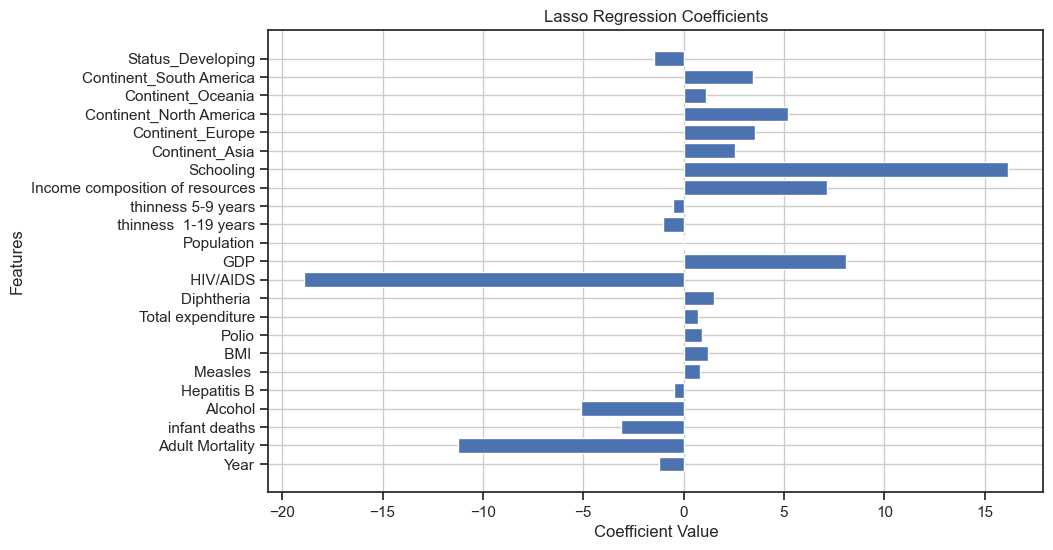

                            Feature  Coefficient
0                              Year    -1.219758
1                   Adult Mortality   -11.223036
2                     infant deaths    -3.140156
3                           Alcohol    -5.106714
4                       Hepatitis B    -0.482020
5                          Measles      0.823615
6                              BMI      1.232173
7                             Polio     0.931389
8                 Total expenditure     0.717154
9                       Diphtheria      1.534594
10                         HIV/AIDS   -18.932644
11                              GDP     8.113032
12                       Population     0.000000
13             thinness  1-19 years    -1.018817
14               thinness 5-9 years    -0.553159
15  Income composition of resources     7.141685
16                        Schooling    16.166841
17                   Continent_Asia     2.578831
18                 Continent_Europe     3.578643
19          Continen

In [50]:
import matplotlib.pyplot as plt

lasso_best.fit(X_train, y_train)  
features = X_train.columns
feature_coef = lasso_best.coef_


plt.figure(figsize=(10, 6))
plt.barh(features, feature_coef)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Lasso Regression Coefficients')
plt.grid(True)
plt.show()

coef_df = pd.DataFrame({'Feature': features, 'Coefficient': feature_coef})
print(coef_df)

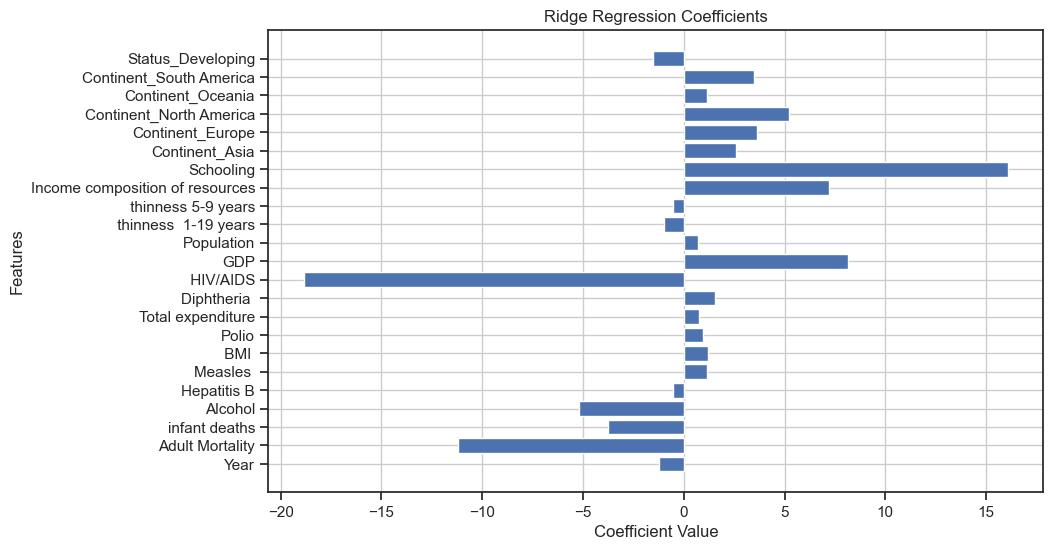

                            Feature  Coefficient
0                              Year    -1.229740
1                   Adult Mortality   -11.207084
2                     infant deaths    -3.762837
3                           Alcohol    -5.187517
4                       Hepatitis B    -0.514736
5                          Measles      1.142118
6                              BMI      1.213393
7                             Polio     0.940386
8                 Total expenditure     0.749472
9                       Diphtheria      1.552316
10                         HIV/AIDS   -18.862605
11                              GDP     8.126891
12                       Population     0.689555
13             thinness  1-19 years    -0.984780
14               thinness 5-9 years    -0.557239
15  Income composition of resources     7.209164
16                        Schooling    16.097219
17                   Continent_Asia     2.593612
18                 Continent_Europe     3.617182
19          Continen

In [51]:
import matplotlib.pyplot as plt

ridge_best.fit(X_train, y_train)  
features = X_train.columns
feature_coef = ridge_best.coef_

plt.figure(figsize=(10, 6))
plt.barh(features, feature_coef)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Ridge Regression Coefficients')
plt.grid(True)
plt.show()

coef_df = pd.DataFrame({'Feature': features, 'Coefficient': feature_coef})
print(coef_df)

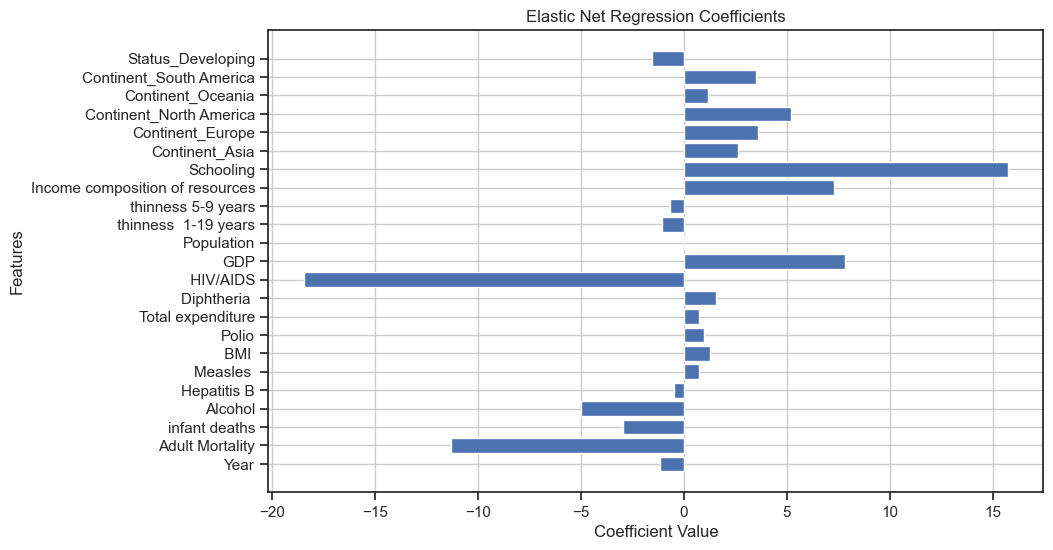

                            Feature  Coefficient
0                              Year    -1.161110
1                   Adult Mortality   -11.288275
2                     infant deaths    -2.938077
3                           Alcohol    -4.989318
4                       Hepatitis B    -0.478441
5                          Measles      0.721766
6                              BMI      1.258622
7                             Polio     0.959469
8                 Total expenditure     0.722252
9                       Diphtheria      1.548169
10                         HIV/AIDS   -18.466625
11                              GDP     7.830421
12                       Population     0.000000
13             thinness  1-19 years    -1.042953
14               thinness 5-9 years    -0.664995
15  Income composition of resources     7.275215
16                        Schooling    15.747127
17                   Continent_Asia     2.637354
18                 Continent_Europe     3.610218
19          Continen

In [52]:
import matplotlib.pyplot as plt


elastic_best.fit(X_train, y_train) 
feature_coef = elastic_best.coef_
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_coef)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Elastic Net Regression Coefficients')
plt.grid(True)
plt.show()

coef_df = pd.DataFrame({'Feature': features, 'Coefficient': feature_coef})
print(coef_df)

> **Factors Affecting Life Expectancy: Coefficient Interpretation** <br>
> Features such as 'Adult Mortality,' 'HIV/AIDS,' and 'Alcohol' display profound negative impacts, indicating that higher values in these areas significantly reduce life expectancy. Conversely, 'Income composition of resources,' 'GDP,' 'Schooling' and the geographical location of countries, particularly in continents like Europe, North America, and South America, exhibit strong positive associations, suggesting that improvements in these aspects tend to elevate life expectancy. Moreover, features like 'Population' and some health-related factors like 'Hepatitis B' and 'thinness 1-19 years', 'thinness 5-9 years' illustrate weaker or negligible impacts, implying their limited influence on life expectancy prediction. 

<span><h1 style="color: Maroon;"> 6. Conclusion </h1></span>



- **Build regression models employing mixed effects models and multiple linear regression techniques to assess the impact of critical factors such as immunization, mortality rates, economic conditions, and social determinants on life expectancy.**

> **- Immunization (Hepatitis B and Polio):** These immunization-related factors positively influence life expectancy. Higher rates of immunization against diseases like Hepatitis B and Polio are associated with increased life expectancy.<br>
> **- Mortality Rates (Adult Mortality, Infant deaths, HIV/AIDS):** Higher rates of adult mortality, infant deaths, and HIV/AIDS negatively impact life expectancy. These factors suggest that regions with higher mortality rates tend to have lower life expectancies.<br>
> **- Economic Conditions (GDP, Total expenditure, Income composition of resources):** Improvements in economic conditions, indicated by higher GDP, increased total expenditure on healthcare, and a higher income composition of resources, are positively associated with life expectancy. Better economic conditions often correlate with increased life expectancy.<br>
>  Factors like increasing BMI, schooling years, and residing in certain continents (Asia, Europe, North America, Oceania, South America) tend to positively influence life expectancy. However, being in a developing status has a negative impact.<br>

- **Investigate the correlation between lifestyle choices (diet, exercise, smoking, alcohol consumption), education (schooling), and population density with life expectancy.**

**Lifestyle Choices:**
Alcohol Consumption: Coefficient: -4.989318
There is a negative correlation between alcohol consumption and life expectancy. Higher alcohol consumption is associated with reduced life expectancy.<br>

**BMI (Body Mass Index): Coefficient: 1.258622**
BMI shows a positive correlation with life expectancy. This suggests that a healthy BMI positively influences life expectancy.<br>

**Smoking (Not Directly Available):**
Since smoking information is not explicitly provided in the coefficients, it might have been included as a contributing factor under other features like Adult Mortality or other health-related indicators.<br>

**Education (Schooling):**
Schooling: Coefficient: 15.747127
Higher schooling years exhibit a strong positive correlation with life expectancy, indicating that education plays a significant role in improving life expectancy.<br>
**Population Density:**
Population (Not Directly Impactful):<br>
The coefficient for Population is zero, indicating that population density, as a single feature, does not directly impact life expectancy in this model.<br>


**Correlation Analysis:**
> Alcohol consumption shows a negative impact on life expectancy, emphasizing the importance of moderate or no alcohol intake for longer life expectancy. BMI demonstrates a positive correlation, suggesting that maintaining a healthy weight contributes positively to life expectancy.
Schooling exhibits a strong positive correlation, highlighting the crucial role of education in improving health outcomes and life expectancy.
Smoking's impact, though not explicitly provided, might be encapsulated within other health-related factors such as Adult Mortality or disease prevalence.<br>


- **Provide recommendations based on the findings to assist countries in identifying areas of focus to enhance their population's life expectancy effectively.**

**Healthcare Interventions:**
Prioritize healthcare programs targeting the reduction of adult mortality rates, HIV/AIDS prevalence, and infant mortality through improved healthcare infrastructure and disease management.
Implement initiatives focusing on maternal and child health, nutrition, and vaccination drives to combat malnutrition and reduce childhood mortality rates.

**Healthcare Accessibility and Affordability:**
Ensure equitable access to quality healthcare services, especially in developing regions, by investing in healthcare infrastructure and making services more accessible and affordable for all socioeconomic groups.

**Education and Awareness Campaigns:**
Develop educational campaigns to promote health literacy, encourage healthy lifestyle choices, and raise awareness about disease prevention and vaccination benefits.

**Economic Empowerment:**
Foster economic growth strategies that emphasize social welfare, healthcare, and education to improve income distribution and living standards, positively impacting life expectancy.

**International Collaboration:**
Encourage collaboration among countries to share best practices, technology, and resources in healthcare, education, and economic development to collectively improve global life expectancy.

<span><h3 style="color:Maroon;"> <u>FUTURE WORK </u></h3></span>


In future studies, there are several avenues that can be explored to enhance the depth and breadth of analysis in understanding life expectancy determinants across diverse populations. Firstly, expanding the dataset to include more recent years beyond 2015 could provide insights into evolving trends and changes in health-related factors affecting life expectancy. Additionally, integrating more granular data on lifestyle choices, such as detailed dietary patterns, specific exercise regimes, and variations in smoking habits, could offer a more nuanced understanding of their impact. Exploring machine learning techniques like Random Forests or Gradient Boosting to complement regression models might further improve prediction accuracy. Moreover, investigating regional variations within countries or focusing on specific demographic groups could uncover targeted interventions for improving life expectancy disparities. Finally, incorporating qualitative data or conducting surveys to understand cultural, social, and behavioral aspects influencing healthcare utilization and health outcomes could provide valuable context to complement quantitative analysis.


<span><h1 style="color: Maroon;"> 6. Reference and Appendix </h1></span>




> NumPy -  https://numpy.org/
Description: NumPy is a fundamental package for scientific computing in Python, providing support for arrays, mathematical functions, linear algebra, and more.

> scikit-learn (sklearn) - https://scikit-learn.org/stable/
Description: scikit-learn is a machine learning library in Python that provides simple and efficient tools for data mining and data analysis. It offers various regression models, preprocessing tools, and model evaluation techniques.

> Seaborn (sns) - https://seaborn.pydata.org/
> Description: Seaborn is a Python data visualization library based on Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.

> Pandas - https://pandas.pydata.org/
Description: Pandas is a powerful data manipulation and analysis library that provides easy-to-use data structures and tools for handling structured data.

> Dr. Yoonsung Jung's notes for the STAT 650 course:  https://canvas.tamu.edu/<br>

